---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

# Tarefa 7 - Filtros espaciais

Inicialmente carrega-se e mostra-se a imagem que será utilizada durante a tarefa.

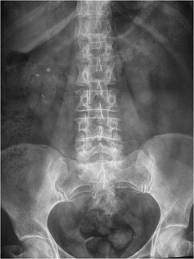

In [67]:
pkg load image
img = imread('raios X 4_1.jpg');
imshow(img)

## Filtros de média

A primeira parte desta tarefa é aplicar três diferentes filtros de média à imagem de análise, cujas dimensões são 3x3, 5x5 e 9x9. Na célula abaixo são inicializados os filtros.

In [68]:
mean_3x3 = ones(3,3)/9;
mean_5x5 = ones(5,5)/25;
mean_9x9 = ones(9,9)/81;

Em seguida os filtros são aplicados com o auxílio da função ```imfilter```:

In [69]:
img_mean_3x3 = imfilter(img, mean_3x3);
img_mean_5x5 = imfilter(img, mean_5x5);
img_mean_9x9 = imfilter(img, mean_9x9);

Os resultados são apresentados abaixo:

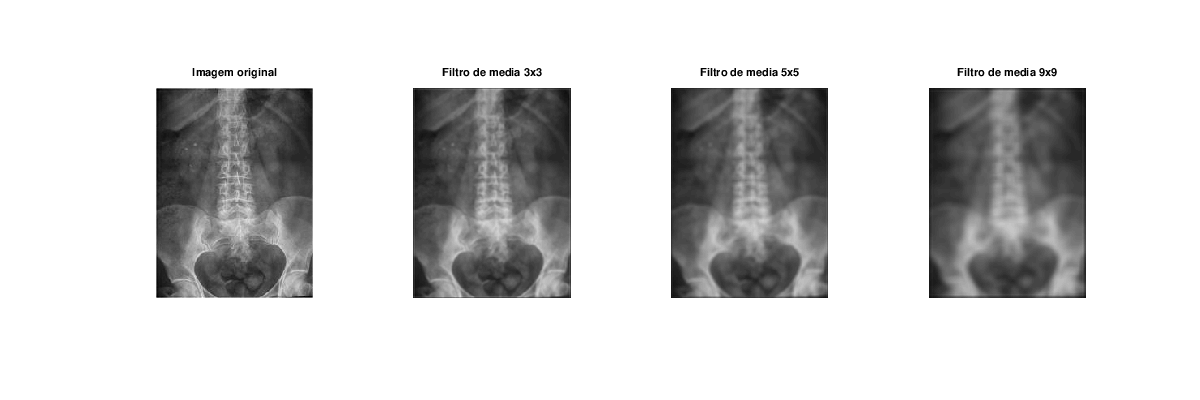

In [70]:
figure();

subplot(1,4,1);
imshow(uint8(img));
title('Imagem original');

subplot(1,4,2);
imshow(uint8(img_mean_3x3));
title('Filtro de media 3x3');

subplot(1,4,3);
imshow(uint8(img_mean_5x5));
title('Filtro de media 5x5');

subplot(1,4,4);
imshow(uint8(img_mean_9x9));
title('Filtro de media 9x9');


set(gcf,'Position',[0 0 1200 400])

Ao analisar o resultado das filtragens, observa-se que ao aumentar a ordem do filtro de média, também aumenta o borramento da imagem. O resultado para o filtro de média 3x3 pode ser considerado um resultado desejado, uma vez que parte do ruído da imagem original foi removido e a suavização da imagem foi proporcionado. Porém ao considerar os filtros 5x5 e 9x9 o efeito já é demasiadamente exagerado, podendo ocasionar perda de informação.

## Filtros de média ponderada

Nesta seção será tratado o filtro de média ponderada em comparação com os filtros de média aritimética utilizados anteriormente. Para termos de comparação, será utilizado o filtro de média aritimética 5x5, como definido em células anteriores e o filtro de média ponderada definido a seguir:

In [71]:
mean_pon = [2,3,2; 2,7,2; 2,3,2]./25;
sum(mean_pon(:))

ans =  1.00000


Nota-se que apesar do filtro possuir o peso dos seus coeficientes distribuídos em relação ao peso central, a matriz do filtro, de forma geral, apresenta a soma de seus coeficientes igual a unidade.

Abaixo realiza-se a filtragem e comparação dos resultados gráficos:

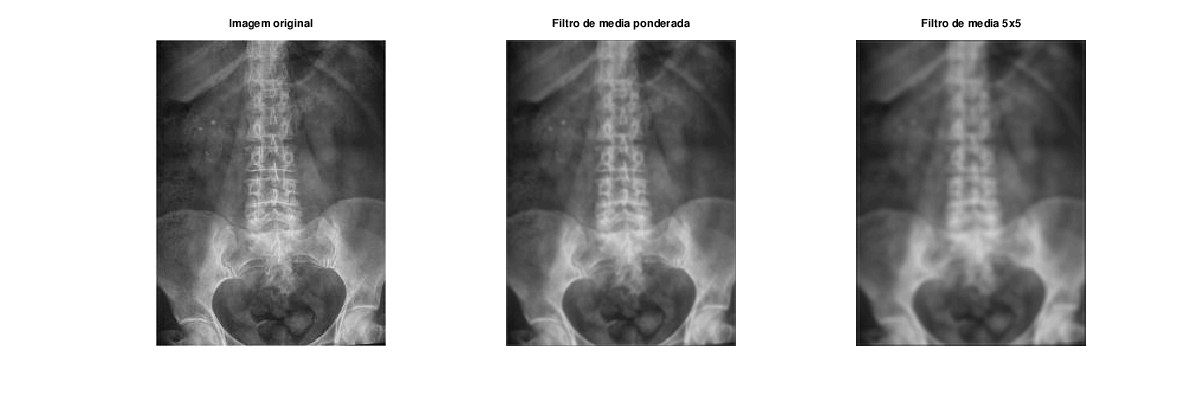

In [72]:
img_mean_pon = imfilter(img, mean_pon);

figure();

subplot(1,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(1,3,2);
imshow(uint8(img_mean_pon));
title('Filtro de media ponderada');

subplot(1,3,3);
imshow(uint8(img_mean_5x5));
title('Filtro de media 5x5');


set(gcf,'Position',[0 0 1200 400])

Primeiramente nota-se que o borramento do filtro de média ponderada foi menor que o outro. Isso se deve, além de suas dimensões serem menores, à capacidade do filtro de média ponderada ajustar seus pesos de forma que o pixel central possua maior peso e que seus vizinhos horizontais e verticais exerçam menor efeito à imagem filtrada e, de forma descendente, que os vizinhos diagonais exerçam ainda menor efeito. Neste caso os pixels vizinhos horizontais e diagonais possuem mesmos pesos e menores que os vizinhos verticais.

## Filtros detectores de bordas

Nesta seção será testada uma biblioteca de filtros padrões da literatura para detecção de bordas, i.e.: Roberts, Sobel, Prewitt e Frei-Chen; todos com suas parcelas verticais e horizontais. Abaixo são inicializados os filtros:

In [73]:
roberts_ver = [0,0,-1; 0,1,0; 0,0,0];
roberts_hor = [-1,0,0; 0,1,0; 0,0,0];

sobel_ver = [1,0,-1; 2,0,-2; 1,0,-1]./4;
sobel_hor = [-1,-2,-1; 0,0,0; 1,2,1]./4;

prewitt_ver = [1,0,-1; 1,0,-1; 1,0,-1]./3;
prewitt_hor = [-1,-1,-1; 0,0,0; 1,1,1]./3;

freichen_ver = [1,0,-1; sqrt(2),0,-sqrt(2)]./(2+sqrt(2));
freichen_hor = [-1,-sqrt(2),-1; 0,0,0; 1,sqrt(2),1]./(2+sqrt(2));

Abaixo são aplicados os filtros:

In [74]:
% Roberts
img_rob_ver = imfilter(img, roberts_ver);
img_rob_hor = imfilter(img, roberts_hor);

% Sobel
img_sob_ver = imfilter(img, sobel_ver);
img_sob_hor = imfilter(img, sobel_hor);

% Prewitt
img_pre_ver = imfilter(img, prewitt_ver);
img_pre_hor = imfilter(img, prewitt_hor);

% Frei-Chen
img_frei_ver = imfilter(img, freichen_ver);
img_frei_hor = imfilter(img, freichen_hor);

E em seguida os resultados:

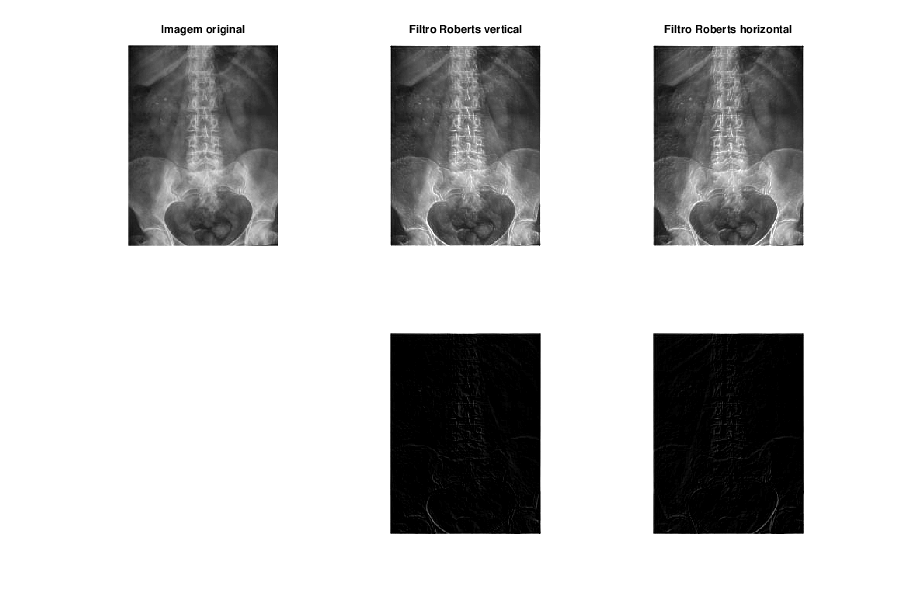

In [75]:
figure();

subplot(2,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(2,3,2);
imshow(uint8(img_rob_ver+img));
title('Filtro Roberts vertical');

subplot(2,3,3);
imshow(uint8(img_rob_hor+img));
title('Filtro Roberts horizontal');

subplot(2,3,5);
imshow(uint8(img_rob_ver));

subplot(2,3,6);
imshow(uint8(img_rob_hor));


set(gcf,'Position',[0 0 900 600])

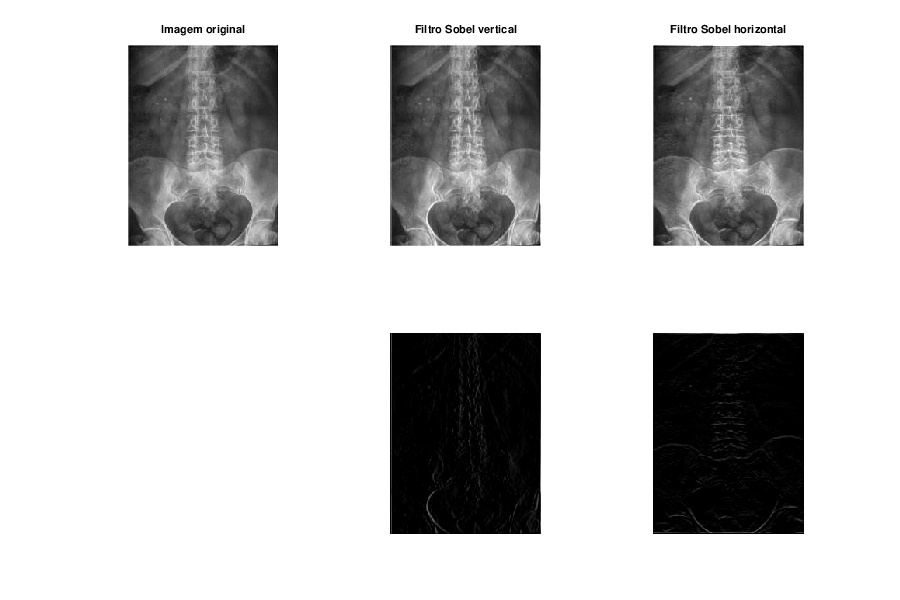

In [76]:
figure();

subplot(2,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(2,3,2);
imshow(uint8(img_sob_ver+img));
title('Filtro Sobel vertical');

subplot(2,3,3);
imshow(uint8(img_sob_hor+img));
title('Filtro Sobel horizontal');

subplot(2,3,5);
imshow(uint8(img_sob_ver));

subplot(2,3,6);
imshow(uint8(img_sob_hor));


set(gcf,'Position',[0 0 900 600])

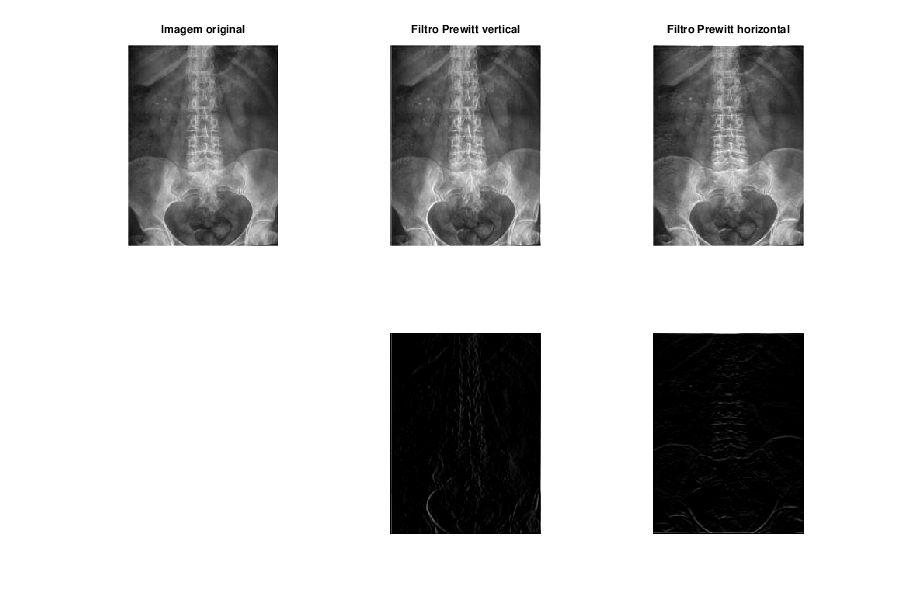

In [77]:
figure();

subplot(2,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(2,3,2);
imshow(uint8(img_pre_ver+img));
title('Filtro Prewitt vertical');

subplot(2,3,3);
imshow(uint8(img_pre_hor+img));
title('Filtro Prewitt horizontal');

subplot(2,3,5);
imshow(uint8(img_pre_ver));

subplot(2,3,6);
imshow(uint8(img_pre_hor));


set(gcf,'Position',[0 0 900 600])

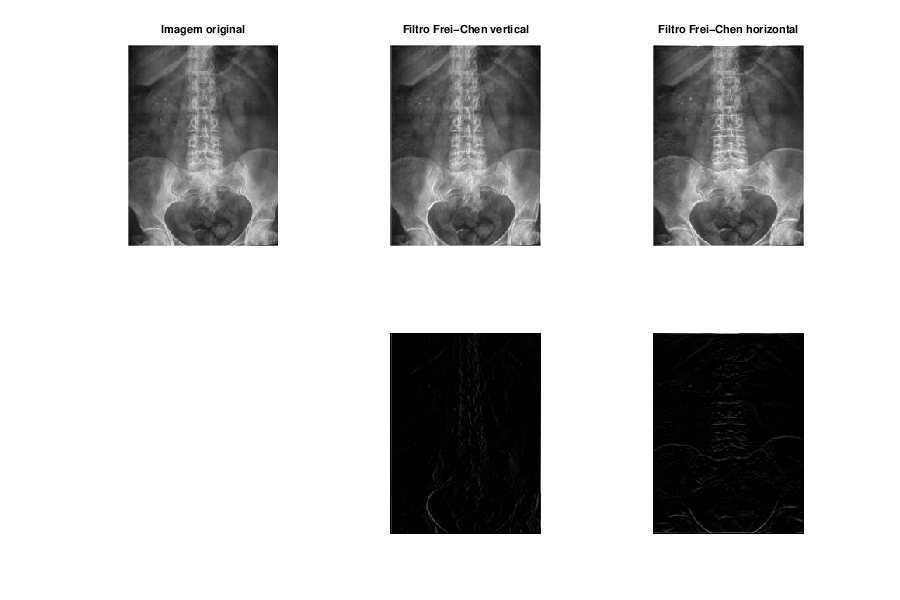

In [78]:
figure();

subplot(2,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(2,3,2);
imshow(uint8(img_frei_ver+img));
title('Filtro Frei-Chen vertical');

subplot(2,3,3);
imshow(uint8(img_frei_hor+img));
title('Filtro Frei-Chen horizontal');

subplot(2,3,5);
imshow(uint8(img_frei_ver));

subplot(2,3,6);
imshow(uint8(img_frei_hor));


set(gcf,'Position',[0 0 900 600])

A partir dos resultados dos filtros e das imagens realçadas, podem se traçados comentários.

A configuração dos filtros verticais e horizontais de Roberts apesar de diferentes, geraram resultados com poucas divergências. As bordas foram detectadas coerentemente, mas com um leve detalhe nas bordas verticais e horizontais para cada filtro;

Os demais filtros de Sobel, Prewitt e Frei-Chen apresentaram resultados semelhantes, mas que divergem dos filtros de Roberts. Neste caso filtro se preocupou em detectar as bordas da sua direção em específico, i.e para o caso vertical foram detectadas apenas bordas verticais e vice-versa para o caso horizontal. As curvas também foram detectadas, porém curvas que predominam em uma certa direção (vertical ou horizontal) foram melhor realçadas por seus filtros específicos (vertical ou horizontal), mas não impediu um leve realce por parte do filtro oposto.

## Filtro de mediana

Nesta seção será implementada a comparação entre um filtro de mediana 3x3 com um filtro de média aritimética 3x3. 

Inicialmente será implementada a função para a computação da imagem filtrada pelo filtro de mediana e esta será comparada com o resultado da função ```medfilt2``` que realiza a filtragem por meio de um filtro de mediana de tamanho arbitrário.

In [96]:
function img_median = median_3x3_2d(img)
    img_ = zeros(size(img)+2, class(img));
    img_(2:end-1,2:end-1) = img;
    img_median = zeros(size(img), class(img));
    [m, n] = size(img_);
    for ii = 2 : m-1
        for jj = 2 : n-1
            list = img_(ii-1:ii+1,jj-1:jj+1);
            img_median(ii-1,jj-1) = median(list(:));
        end
    end
end

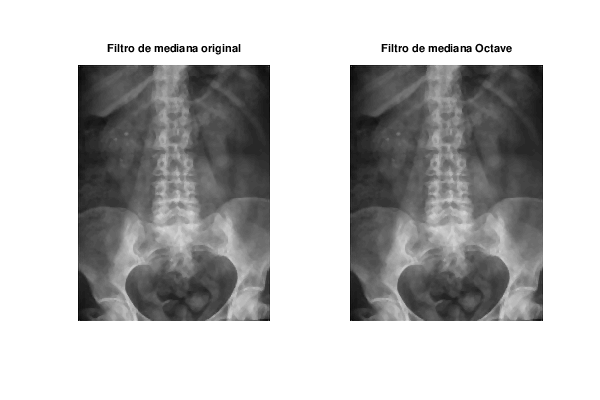

In [97]:
figure();

subplot(1,2,1);
imshow(uint8(median_3x3_2d(img)));
title('Filtro de mediana original');

subplot(1,2,2);
imshow(uint8(medfilt2(img, [3 3])));
title('Filtro de mediana Octave');

set(gcf,'Position',[0 0 600 400])

Visualmente os resultados são os mesmos, assim permitindo avançar para a comparação do filtro de mediana com o filtro média:

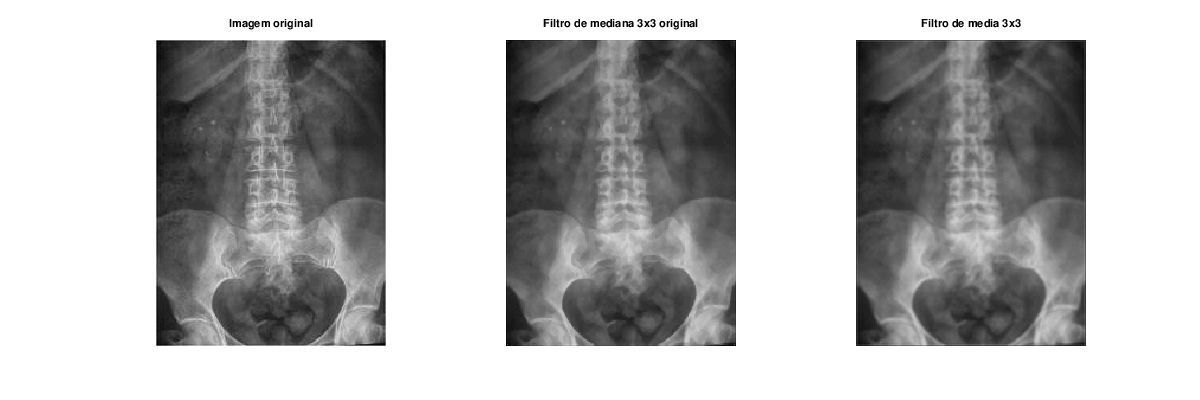

In [99]:
figure();

subplot(1,3,1);
imshow(uint8(img));
title('Imagem original');

subplot(1,3,2);
imshow(uint8(median_3x3_2d(img)));
title('Filtro de mediana 3x3 original');

subplot(1,3,3);
imshow(uint8(img_mean_3x3));
title('Filtro de media 3x3');

set(gcf,'Position',[0 0 1200 400])

Em relação aos resultados, observam-se níveis de suavização semelhante. Porém pela diferente seletividade do filtro de mediana, este permitiu enxergar e preservar melhor as bordas sem maiores suavizações. Mas no geral, seu desempenho foi semelhante ao filtro de média. Talvez se houvesse algum ruído do tipo sal e pimenta, o filtro de mediana poderia mostrar um melhor desempenho na sua suavização.